In [1]:
%matplotlib notebook
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from daxs.measurements import Source, Xas, Xes
from scipy.integrate import simpson
from scipy import stats

## Data preparation

In [2]:
name1 = [#'1a','1b','1c','1d','1e','1f',
        #'2a','2b','2c','2d','2e','2f',
        '3a','3b','3c','3d','3e','3f',
        '4a','4b','4c','4d','4e','4f',
        '6a','6b'
       ] 
name2 = ['2e','2f','5e','5f','5g','6a','6b','6d','6e', #contaminated
         '7a','7b','7c','7e','7f','1d','1h'] #S, Li2S, LiTFSI
  
counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}

### BT1

In [3]:
Data_all = []
for q in name1:

    file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_'+ q + r'\191_' + q + r'_xanes\191_' + q + r'_xanes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 102.1, 100)
    b = np.linspace(3.2, 102.2, 100)

    TSY = []
    TSZ = []
    energy = []
    gdall = []
    I0t = []
    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/hdh_energy' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))

        for i in b:
            #print(i)
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])

#####################################
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))

    ok = []
    ok_3 = []
    max_intensity = []
    for n in range(len(energy)): 
        head =  intensity[n][:50]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-50:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][200:250]
        middle = middle[abs(stats.zscore(middle))<2]
        if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())): #####################################
            ok.append(n)
            ok_3.append(n+3)
    
    data = [] #only select the intensity profiles with intensity 
    for i in range(len(ok)):
        data.append(intensity[i])
    Data = pd.DataFrame(data) #shape = len(ok), 429
    if q == '6a':
        Data['label'] = 'S'
    elif q== '6b':
        Data['label'] = 'Li2S'
    else:
        Data['label'] = 'Li2Sx'
    Data['ID'] = q
    Data_all.append(Data)
df1 = pd.concat(Data_all)

### BT2

In [4]:
Data_all = []
for q in name2:

    file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xanes\252-' + q + r'_xanes.h5'
    file = file.replace('\\', '/')
    
    a = np.linspace(3.1, 102.1, 100)
    b = np.linspace(3.2, 102.2, 100)

    TSY = []
    TSZ = []
    energy = []
    gdall = []
    I0t = []
    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/hdh_energy' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))

        for i in b:
            #print(i)
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])

#####################################
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))

    ok = []
    ok_3 = []
    max_intensity = []
    for n in range(len(energy)): 
        head =  intensity[n][:50]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-50:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][200:250]
        middle = middle[abs(stats.zscore(middle))<2]
        if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())): #####################################
            ok.append(n)
            ok_3.append(n+3)
    
    data = [] #only select the intensity profiles with intensity 
    for i in range(len(ok)):
        data.append(intensity[i])
    Data = pd.DataFrame(data) #shape = len(ok), 429
    if ((q == '7a') or (q == '7b')):
        Data['label'] = 'S'
    elif q== '7c':
        Data['label'] = 'Li2S'
    elif ((q == '7e') or (q == '7f') or (q=='1d') or (q=='1h')):
        Data['label'] = 'LiTFSI'
    else:
        Data['label'] = 'inpure'
    Data['ID'] = q
    Data_all.append(Data)
df2 = pd.concat(Data_all)

In [5]:
finaldf = pd.concat([df1,df2])

In [6]:
finaldf

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,label,ID
0,0.0,-0.0,0.015109,0.022168,0.013350,0.016983,0.018548,0.020400,0.020046,0.015886,...,0.342477,0.326574,0.335832,0.320930,0.317149,0.336117,0.326061,0.340646,Li2Sx,3a
1,0.0,-0.0,0.013839,0.011581,0.010596,0.011330,0.011817,0.012362,0.008961,0.013918,...,0.348357,0.319379,0.339660,0.325854,0.336382,0.325986,0.307552,0.332914,Li2Sx,3a
2,0.0,-0.0,0.021967,0.024933,0.021146,0.026018,0.022743,0.026191,0.022323,0.019641,...,0.418459,0.394866,0.402188,0.378661,0.374928,0.396369,0.388242,0.411894,Li2Sx,3a
3,0.0,-0.0,0.014211,0.012953,0.012743,0.012159,0.011115,0.013830,0.014417,0.014189,...,0.275514,0.235303,0.249845,0.249049,0.259689,0.266332,0.269039,0.251281,Li2Sx,3a
4,0.0,-0.0,0.027562,0.032291,0.025988,0.027270,0.029805,0.027055,0.024425,0.033056,...,0.385500,0.400521,0.382006,0.394786,0.380811,0.429233,0.404029,0.416420,Li2Sx,3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.0,-0.0,0.000751,0.001384,0.001185,0.001871,0.000482,0.003060,0.001191,0.001883,...,0.000626,0.000973,0.000501,0.001010,0.000707,0.000547,0.000736,0.001068,LiTFSI,1h
56,0.0,-0.0,0.008538,0.005111,0.007538,0.005565,0.006068,0.005667,0.009322,0.007305,...,0.016231,0.016548,0.015670,0.015567,0.015523,0.015476,0.015843,0.016997,LiTFSI,1h
57,0.0,0.0,0.005478,0.007227,0.006492,0.006866,0.004705,0.006257,0.006451,0.005951,...,0.013657,0.014255,0.014511,0.014887,0.013979,0.016408,0.014110,0.014919,LiTFSI,1h
58,0.0,-0.0,0.005267,0.004727,0.006432,0.004780,0.005622,0.006764,0.005991,0.003648,...,0.013725,0.015786,0.013662,0.015377,0.014240,0.015350,0.015536,0.012087,LiTFSI,1h


In [7]:
finaldf['label'].value_counts()

Li2Sx     1200
inpure     667
LiTFSI     357
S          300
Li2S       200
Name: label, dtype: int64

## PCA analysis to reduce dimention

In [186]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [349]:
X = finaldf.drop(["label",'ID'], axis=1)
y = finaldf["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
pca = PCA(n_components=0.995)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [169]:
print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_pca_test.shape[1])

Original number of features: 429
Reduced number of features: 38


In [170]:
max(pca.explained_variance_ratio_)

0.9411704732379103

In [171]:
target_names = ['Li2Sx', 'S', 'Li2S', 'inpure', 'LiTFSI']
l=[]
for i in target_names:
    l.append(X_pca_test[y_test == i].shape)
l

[(231, 38), (51, 38), (43, 38), (131, 38), (49, 38)]

<IPython.core.display.Javascript object>


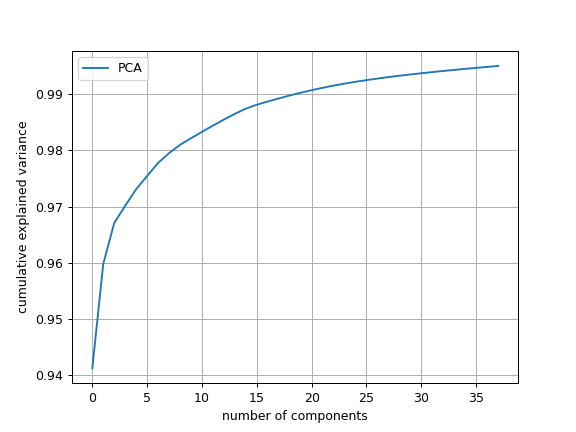

In [172]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="PCA")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend()
plt.grid()

In [95]:
X_pca_test[y_test == 'S'][1].shape, X_pca_test[y_test == 'S', 0].shape, X_pca_test[y_test == 'S', 1].shape

((20,), (51,), (51,))

In [173]:
pca.explained_variance_ratio_

array([9.41170473e-01, 1.86082951e-02, 7.28614926e-03, 3.07380282e-03,
       2.93991093e-03, 2.35509764e-03, 2.32844078e-03, 1.74477755e-03,
       1.48062902e-03, 1.17011903e-03, 1.13916570e-03, 1.11118145e-03,
       1.07455768e-03, 1.02961511e-03, 9.15777509e-04, 7.03411596e-04,
       5.73626016e-04, 5.42688330e-04, 5.32083307e-04, 4.83862248e-04,
       4.53876360e-04, 4.22848739e-04, 3.91562434e-04, 3.54861267e-04,
       3.24863066e-04, 2.94363011e-04, 2.79865775e-04, 2.63662604e-04,
       2.41412999e-04, 2.31448546e-04, 2.13391657e-04, 2.05891942e-04,
       1.98930587e-04, 1.88259062e-04, 1.86917136e-04, 1.75206195e-04,
       1.73368883e-04, 1.68706601e-04])

<IPython.core.display.Javascript object>


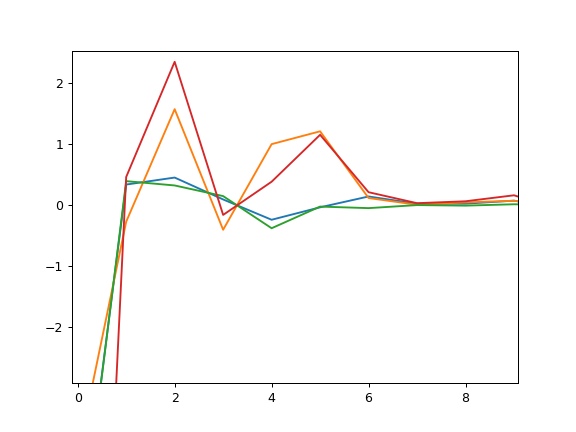

In [177]:
plt.figure()
a = X_pca_test[y_test == 'Li2Sx'][0]#*pca.explained_variance_ratio_[0]
#b = X_pca_test[y_test == 'Li2S'][0]#*pca.explained_variance_ratio_[0]
#c = X_pca_test[y_test == 'S'][0]#*pca.explained_variance_ratio_[0]
b = X_pca_test[y_test == 'Li2Sx'][1]#*pca.explained_variance_ratio_[1]
c = X_pca_test[y_test == 'Li2Sx'][2]#*pca.explained_variance_ratio_[2]
plt.plot(range(len(X_pca_test[y_test == 'Li2Sx'][0])), a)
plt.plot(range(len(X_pca_test[y_test == 'Li2Sx'][0])), b)
plt.plot(range(len(X_pca_test[y_test == 'Li2Sx'][0])), c)
plt.plot(range(len(X_pca_test[y_test == 'Li2Sx'][0])), a+b+c)

#plt.plot(range(X.shape[1]),X.iloc[0])

<IPython.core.display.Javascript object>


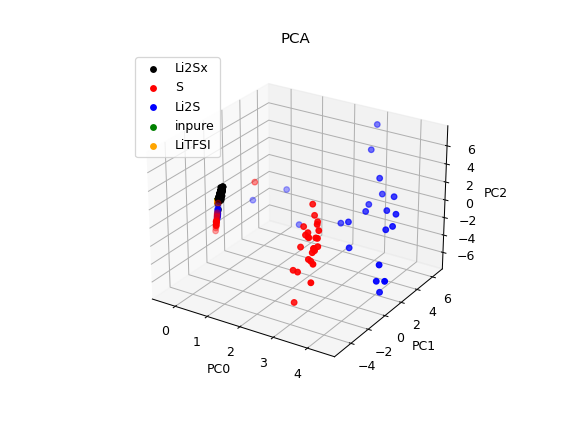

Text(0.5, 0.92, 'PCA')

In [142]:
plt.figure()
ax = plt.axes(projection ="3d")
colors = ['black','red','blue','green','orange']

for color, i, target_name in zip(colors, [0,1,2,3,4], target_names):
    ax.scatter3D(X_pca_test[y_test == target_name, 0],
                X_pca_test[y_test == target_name, 1],
                X_pca_test[y_test == target_name, 2],
                color=color,
                label=target_name)
ax.legend()
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.set_title('PCA')


# Classifier

In [9]:
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

### Data preparation

In [51]:
X = finaldf.drop(["label",'ID'], axis=1)
y = finaldf["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [52]:
y_train.shape, y_test.shape

((2179,), (545,))

In [53]:
y

0      Li2Sx
1      Li2Sx
2      Li2Sx
3      Li2Sx
4      Li2Sx
       ...  
55    LiTFSI
56    LiTFSI
57    LiTFSI
58    LiTFSI
59    LiTFSI
Name: label, Length: 2724, dtype: object

## Random Forest
- Use grid search to find the best parameters for the model

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import os, time

In [158]:
n = np.arange(20, 110, 10, dtype=int).tolist()
n

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [159]:
classifier = RandomForestClassifier(random_state=7733)
classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [160]:
param_grid = dict(
    n_estimators = n,
    criterion = ["gini"],
    max_depth=[None]+np.arange(1, 11, 1, dtype=int).tolist(),
    min_samples_split=[2, 4],
    #min_samples_leaf=[1, 2, 3],
    #min_weight_fraction_leaf=[0.0, 0.1, 0.2],
    max_features=['sqrt', 'log2'],
    #max_leaf_nodes=[None]+[2, 4],
    #min_impurity_decrease=[0.0, 0.01, 0.1]
)

In [161]:
cv = StratifiedKFold(n_splits=5)
grid_search_cv = GridSearchCV(estimator=classifier,
                              param_grid=param_grid,
                              cv=cv,
                              scoring='accuracy', 
                              n_jobs=os.cpu_count()-1)

In [162]:
t1 = time.time()
grid_search_cv.fit(X_train, y_train) # note: pass in the unscaled, original train set
t2 = time.time()

In [163]:
grid_search_cv.best_score_

0.9825603711905515

In [79]:
[*grid_search_cv.cv_results_]

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [164]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 80}

In [165]:
params = {k.split("__")[-1]:v for k,v in grid_search_cv.best_params_.items()}
best_model = RandomForestClassifier(random_state=1234, **params)

In [166]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=4,
                       n_estimators=80, random_state=1234)

In [167]:
best_model.classes_

array(['Li2S', 'Li2Sx', 'LiTFSI', 'S', 'inpure'], dtype=object)

In [168]:
y_true = y_test
y_pred = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)
accuracy_score(y_true = y_true, y_pred = y_pred)

0.9926605504587156

In [169]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[ 31,   0,   0,   0,   0],
       [  0, 231,   0,   0,   0],
       [  0,   0,  77,   0,   4],
       [  0,   0,   0,  62,   0],
       [  0,   0,   0,   0, 140]], dtype=int64)

<IPython.core.display.Javascript object>


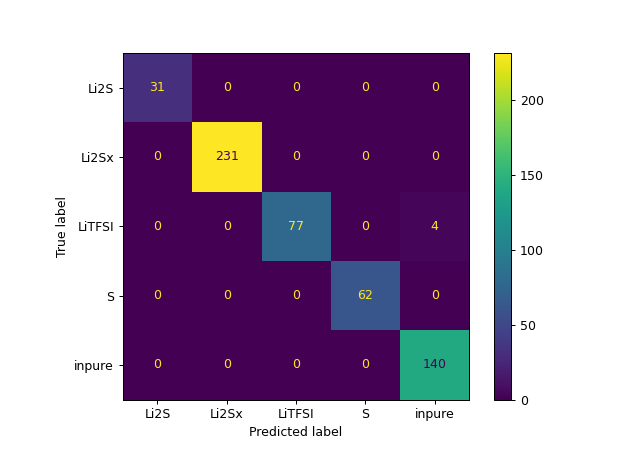

In [170]:
fig, ax = plt.subplots(figsize=(7,5))
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot(ax=ax);

In [171]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

        Li2S       1.00      1.00      1.00        31
       Li2Sx       1.00      1.00      1.00       231
      LiTFSI       1.00      0.95      0.97        81
           S       1.00      1.00      1.00        62
      inpure       0.97      1.00      0.99       140

    accuracy                           0.99       545
   macro avg       0.99      0.99      0.99       545
weighted avg       0.99      0.99      0.99       545



In [172]:
import pickle

In [175]:
filename = 'random_forest.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [174]:
best_model = pickle.load(open(filename, 'rb'))
result = best_model.score(X_test, y_test)
print(result)

0.9926605504587156


# Adaboosting

In [144]:
tree_1 = DecisionTreeClassifier(max_depth=1, random_state=11)
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=11)
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=11)

In [145]:
classifier = AdaBoostClassifier(random_state=7733)
classifier.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [146]:
param_grid = dict(
    base_estimator = [tree_1, tree_2, tree_3],
    n_estimators = n,
    learning_rate = [0.01, 0.1, 1, 10] 
)

In [147]:
cv = StratifiedKFold(n_splits=5)
grid_search_cv_ada = GridSearchCV(estimator=classifier,
                              param_grid=param_grid,
                              cv=cv,
                              scoring='accuracy', 
                              n_jobs=os.cpu_count()-1)

In [148]:
t1 = time.time()
grid_search_cv_ada.fit(X_train, y_train) # note: pass in the unscaled, original train set
t2 = time.time()

In [149]:
grid_search_cv_ada.best_score_

0.9816418854792787

In [150]:
grid_search_cv_ada.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=11),
 'learning_rate': 1,
 'n_estimators': 90}

In [151]:
params = {k.split("__")[-1]:v for k,v in grid_search_cv_ada.best_params_.items()}
best_model = AdaBoostClassifier(random_state=1234, **params)

In [152]:
best_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=11),
                   learning_rate=1, n_estimators=90, random_state=1234)

In [153]:
y_true = y_test
y_pred = best_model.predict(X_test)
y_score = best_model.predict_proba(X_test)
accuracy_score(y_true = y_true, y_pred = y_pred)

0.9834862385321101

In [154]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[ 30,   0,   0,   1,   0],
       [  0, 231,   0,   0,   0],
       [  0,   0,  74,   0,   7],
       [  0,   0,   0,  62,   0],
       [  0,   0,   1,   0, 139]], dtype=int64)

<IPython.core.display.Javascript object>


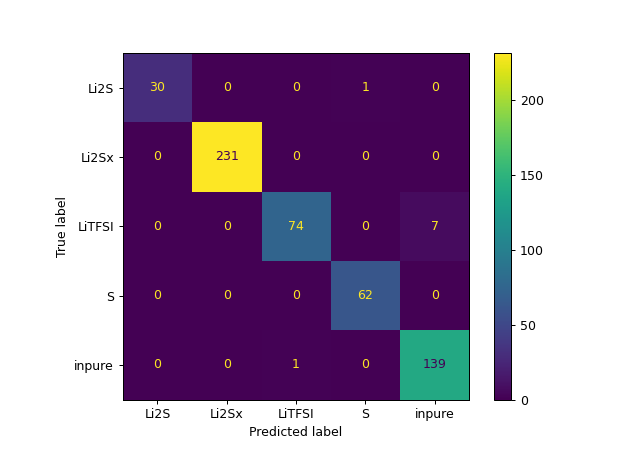

In [155]:
fig, ax = plt.subplots(figsize=(7,5))
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot(ax=ax);

In [122]:
q = '1c'
#BT1
#file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_'+ q + r'\191_' + q + r'_xanes\191_' + q + r'_xanes.h5'
#BT2
file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xanes\252-' + q + r'_xanes.h5'
file = file.replace('\\', '/')

a = np.linspace(3.1, 102.1, 100)
b = np.linspace(3.2, 102.2, 100)

TSY = []
TSZ = []
energy = []
gdall = []
I0t = []

with h5py.File(file, 'r') as f:
    for i in a:
        #print(i)
        g = f.get('%s/instrument/hdh_energy' %f'{i}')
        energy.append(np.array(g.get('data')))
        h = f.get('%s/instrument/gdall' %f'{i}')
        gdall.append(np.array(h.get('data')))
        l = f.get('%s/instrument/I0t' %f'{i}')
        I0t.append(np.array(l.get('data')))
    
    for i in b:
        #print(i)
        g = f.get('%s/instrument/TSY_cnt' %f'{i}')
        TSY.append(np.array(g.get('data'))[0])
        h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
        TSZ.append(np.array(h.get('data'))[0])
    
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))

In [123]:
ok = []
ok_3 = []
max_intensity = []
for n in range(len(energy)): 
    head =  intensity[n][:50]
    head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
    tail = intensity[n][-50:]
    tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
    middle = intensity[n][200:250]
    middle = middle[abs(stats.zscore(middle))<2]
    if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())): 
        ok.append(n)
        ok_3.append(n+3)
    
    peak = intensity[n][100:250]
    for i in range(2,len(peak)-2):
        before = peak[i-2:i].mean()
        after = peak[i+1:i+3].mean()
        low =  peak[i-2:i+3].min()
        if peak[i]-low > 4*(before-low + after-low)/2:
            peak[i] = (before + after)/2
    max_intensity.append(simpson(peak))
    
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))

In [124]:
len(ok)

94

In [125]:
best_model.predict(intensity)

array(['inpure', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'inpure', 'inpure',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'inpure', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'inpure', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI',
       'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTFSI', 'LiTF

<IPython.core.display.Javascript object>


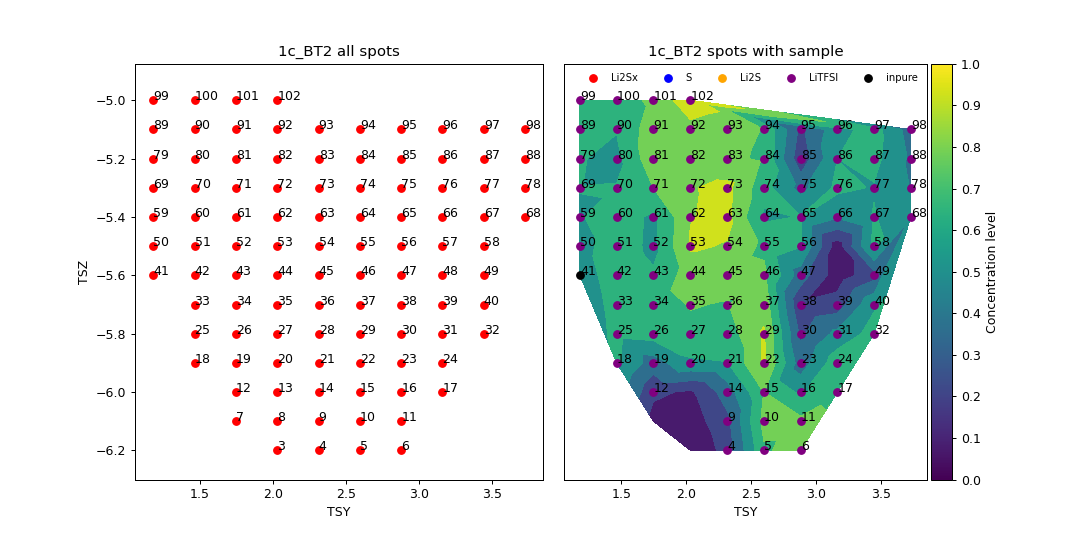

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_23992\713952302.py:16: UserWarning: The following kwargs were not used by contour: 'level'
  ax2.tricontourf(TSY,TSZ,max_intensity, level=50)


Text(0.5, 1.0, '1c_BT2 spots with sample')

In [126]:
#####################################
fig = plt.figure(figsize=(12, 6), dpi=100)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1], sharey=ax1)

cmap = plt.cm.get_cmap()
norm = mpl.colors.Normalize(vmin = 0, vmax = 1)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
colors = plt.cm.jet(np.linspace(0, 1, 100))
ticks = np.linspace(0, 1, 11)
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Concentration level')

ax2.tricontourf(TSY,TSZ,max_intensity, level=50)

target_names = ['Li2Sx', 'S', 'Li2S', 'LiTFSI', 'inpure']
colors = ['red','blue','orange','purple','black']

for i in ok:
    if best_model.predict([intensity[i]]) == 'Li2Sx':
        ax2.scatter(TSY[i], TSZ[i], color = colors[0])
        ax2.text(TSY[i], TSZ[i], i+3)
    elif best_model.predict([intensity[i]]) == 'S':
        ax2.scatter(TSY[i], TSZ[i], color = colors[1])
        ax2.text(TSY[i], TSZ[i], i+3)
    elif best_model.predict([intensity[i]]) == 'Li2S':
        ax2.scatter(TSY[i], TSZ[i], color = colors[2])
        ax2.text(TSY[i], TSZ[i], i+3)
    elif best_model.predict([intensity[i]]) == 'LiTFSI':
        ax2.scatter(TSY[i], TSZ[i], color = colors[3])
        ax2.text(TSY[i], TSZ[i], i+3)
    elif best_model.predict([intensity[i]]) == 'inpure':
        ax2.scatter(TSY[i], TSZ[i], color = colors[4])
        ax2.text(TSY[i], TSZ[i], i+3)

for i in range(len(target_names)):
    ax2.scatter(max(TSY)+1, max(TSZ)+1, color = colors[i], label = target_names[i])

ax2.legend(ncol=len(target_names), fontsize=8, frameon=False)

for i in range(len(TSY)):
    ax1.scatter(TSY[i], TSZ[i], color = 'red')
    ax1.text(TSY[i], TSZ[i], i+3)
''' '''
ax1.set_xlabel('TSY')
ax2.set_xlabel('TSY')

ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)

ax1.set_ylim(min(TSZ)-0.1, max(TSZ)+0.125)
ax1.set_ylabel('TSZ')

ax2.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=False,
                    right=False,
                    labelright=False,
                    labelleft=False,
                    labelsize=10.0)    # labels along the bottom edge are off
ax1.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=True,
                    right=False,
                    labelright=False,
                    labelleft=True,
                    labelsize=10.0)    # labels along the bottom edge are off
ax1.set_title('%s_BT2 all spots'%q)
ax2.set_title('%s_BT2 spots with sample'%q)

#plt.savefig('test')#'%s spots_BT1.png'%q, bbox_inches='tight')
 #####################################

# XES

<IPython.core.display.Javascript object>


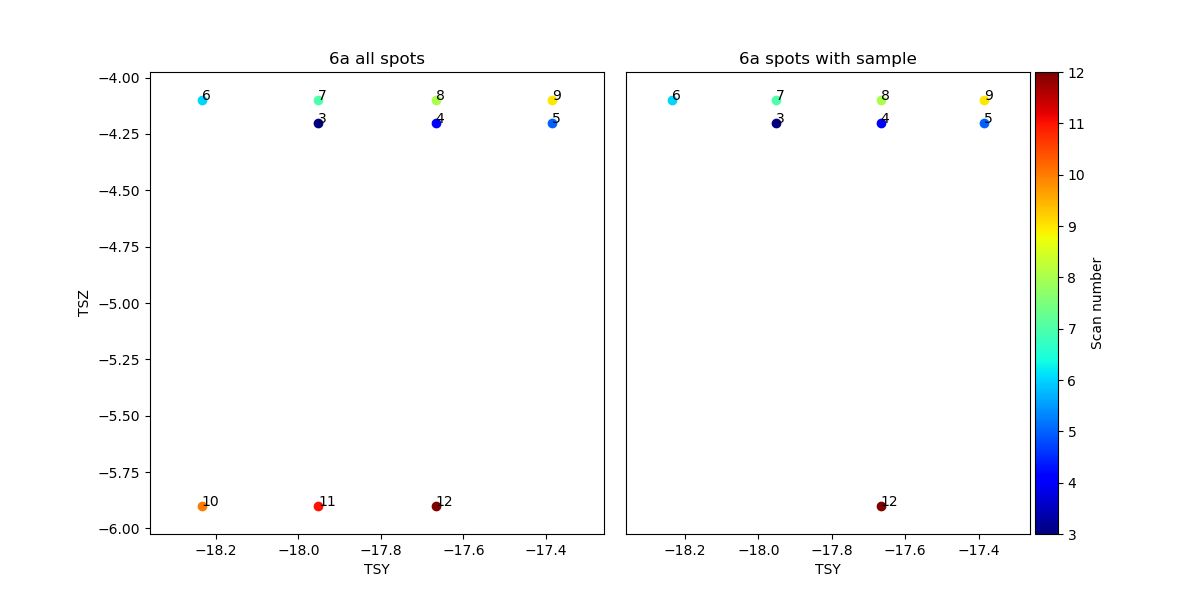

<IPython.core.display.Javascript object>


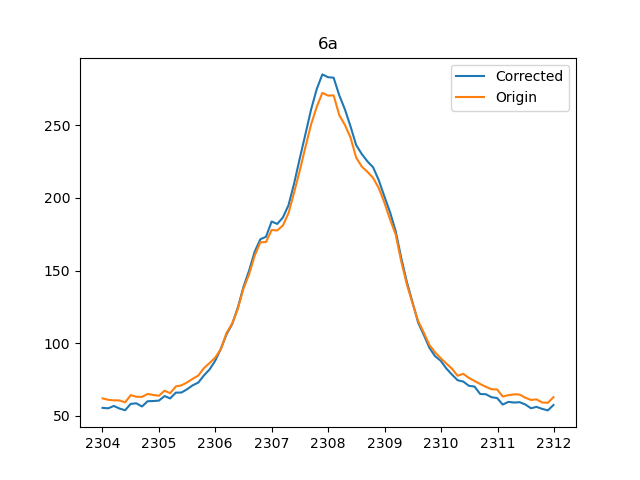

<IPython.core.display.Javascript object>


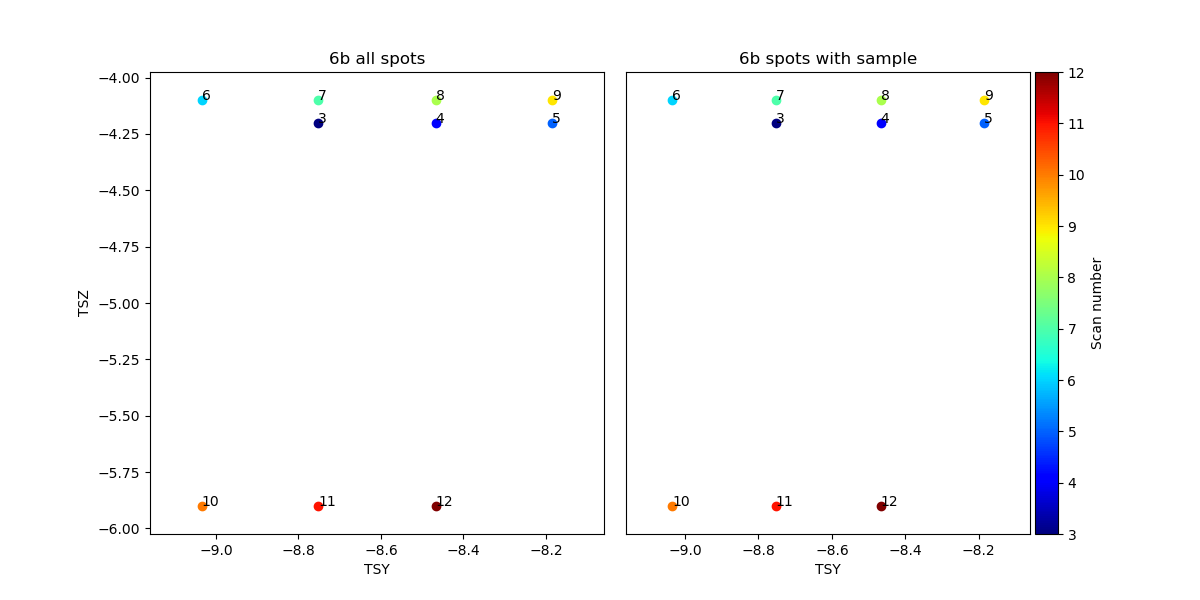

<IPython.core.display.Javascript object>


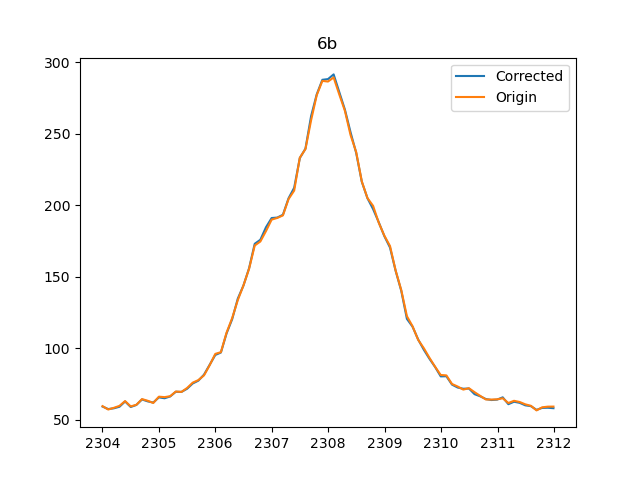

<IPython.core.display.Javascript object>


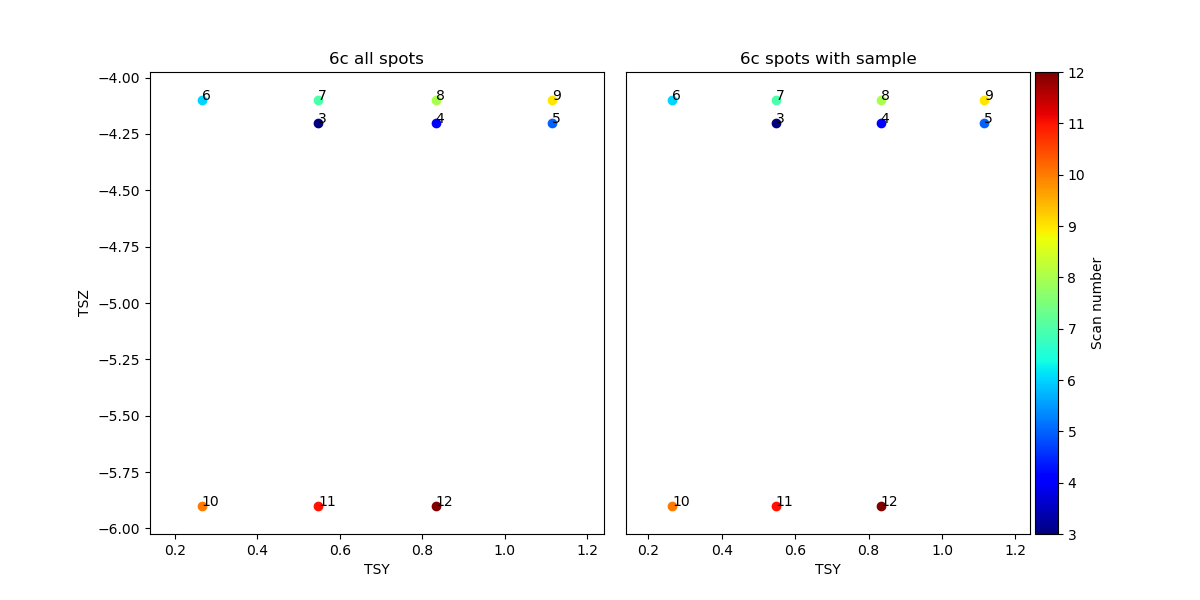

<IPython.core.display.Javascript object>


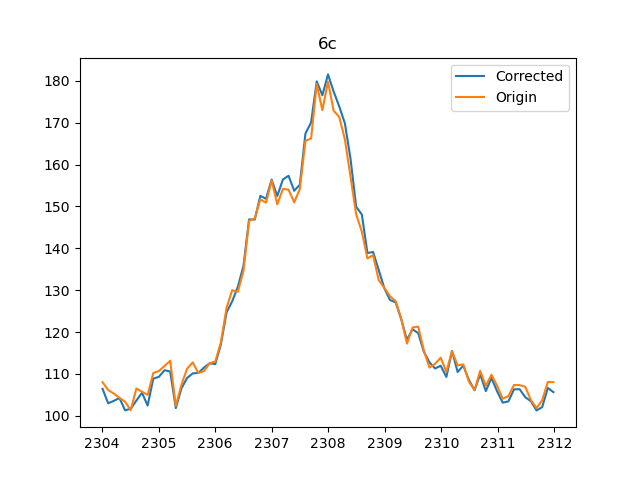

<IPython.core.display.Javascript object>


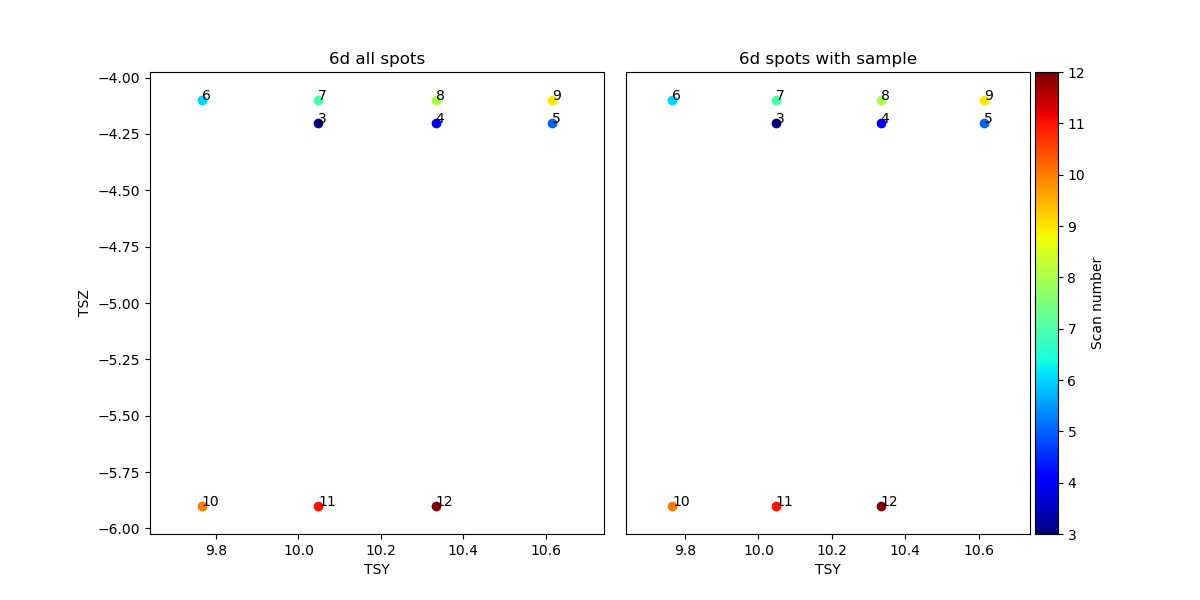

<IPython.core.display.Javascript object>


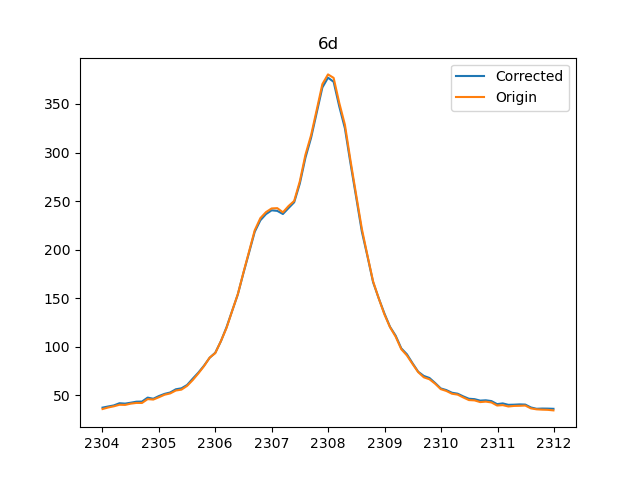

<IPython.core.display.Javascript object>


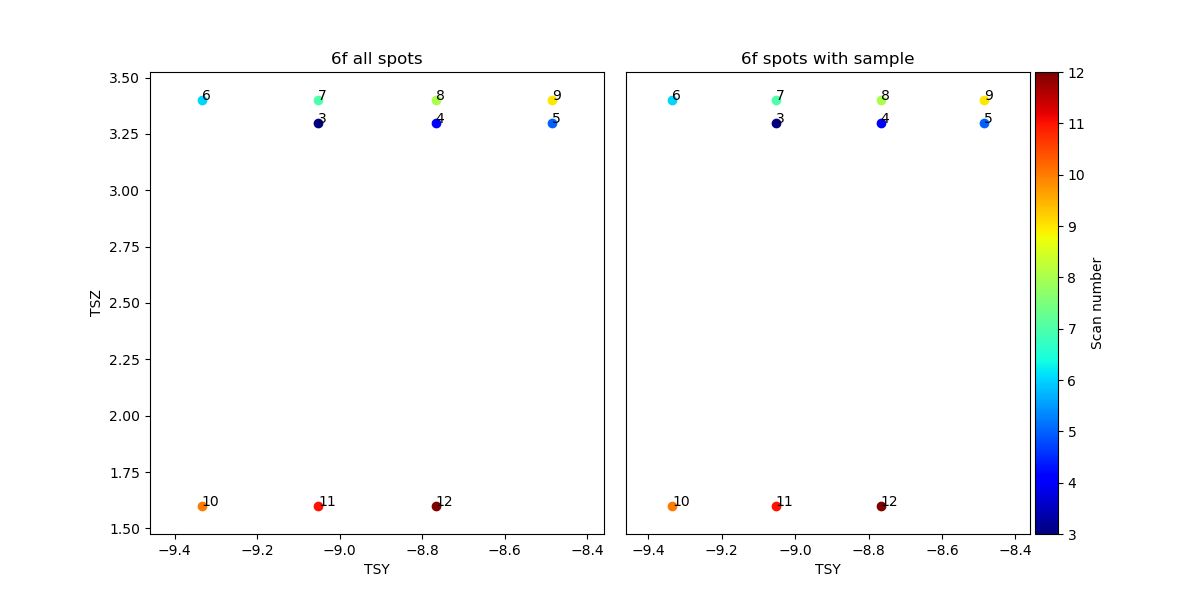

<IPython.core.display.Javascript object>


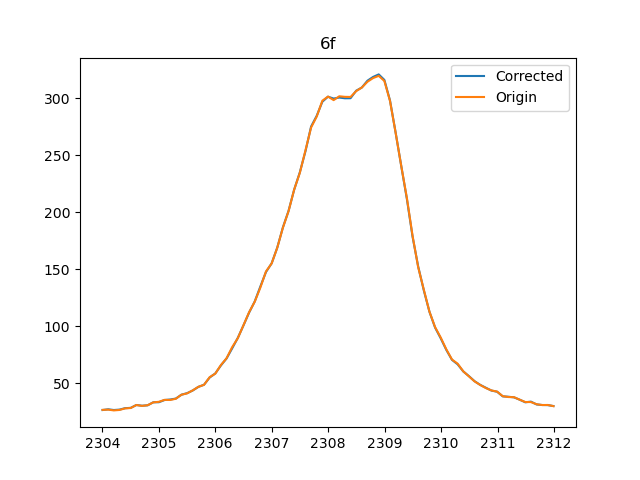

<IPython.core.display.Javascript object>


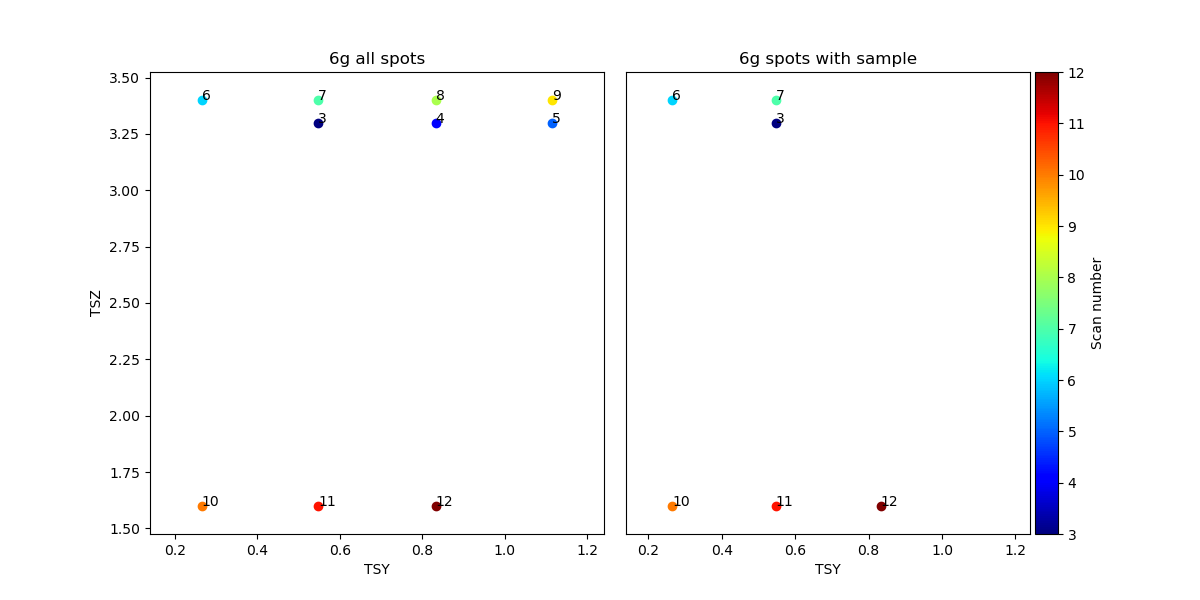

<IPython.core.display.Javascript object>


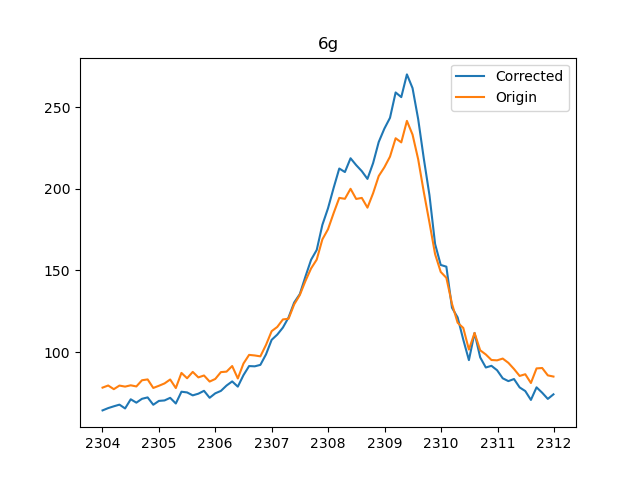

<IPython.core.display.Javascript object>


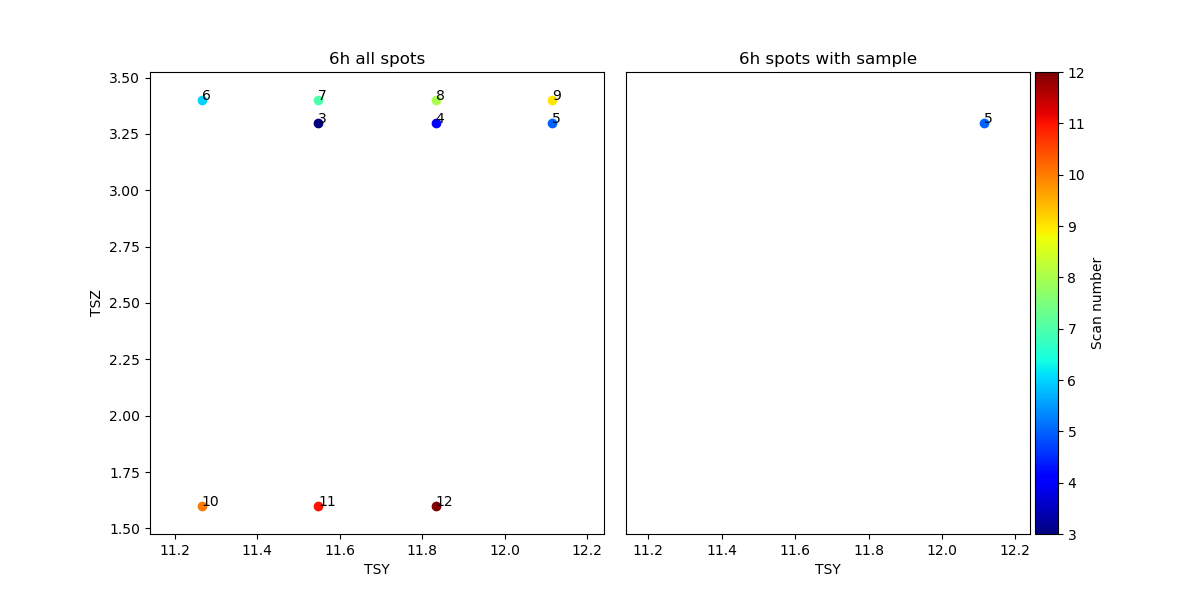

<IPython.core.display.Javascript object>


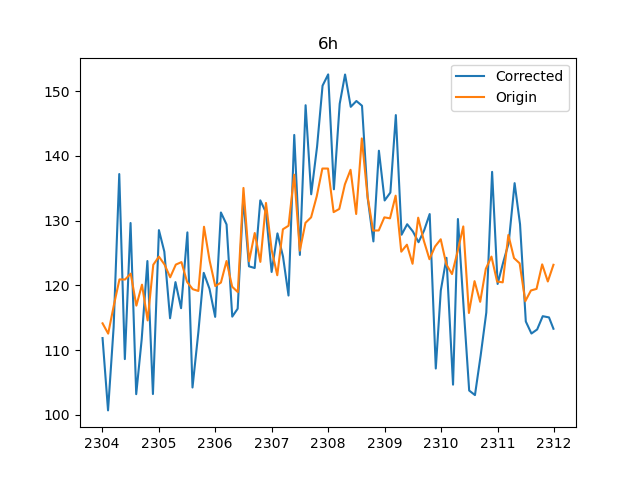

<IPython.core.display.Javascript object>


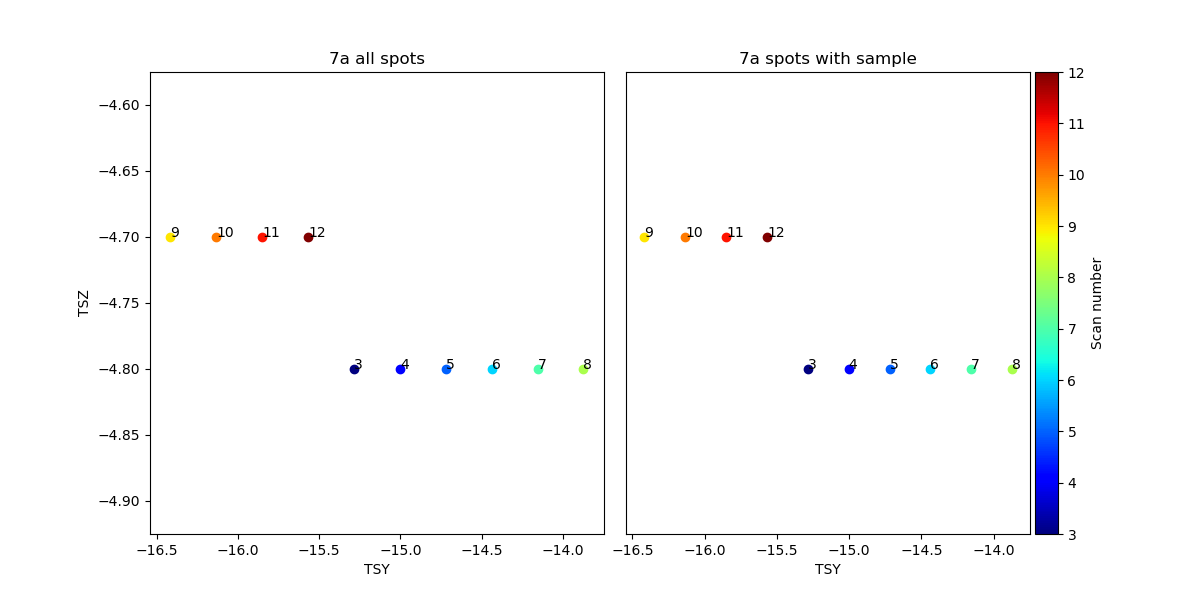

<IPython.core.display.Javascript object>


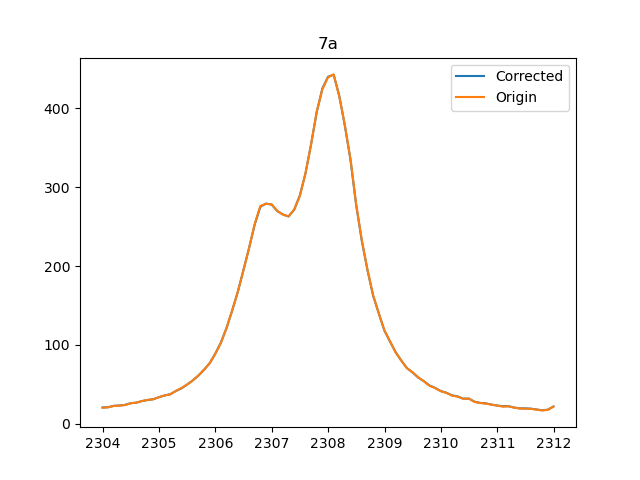

<IPython.core.display.Javascript object>


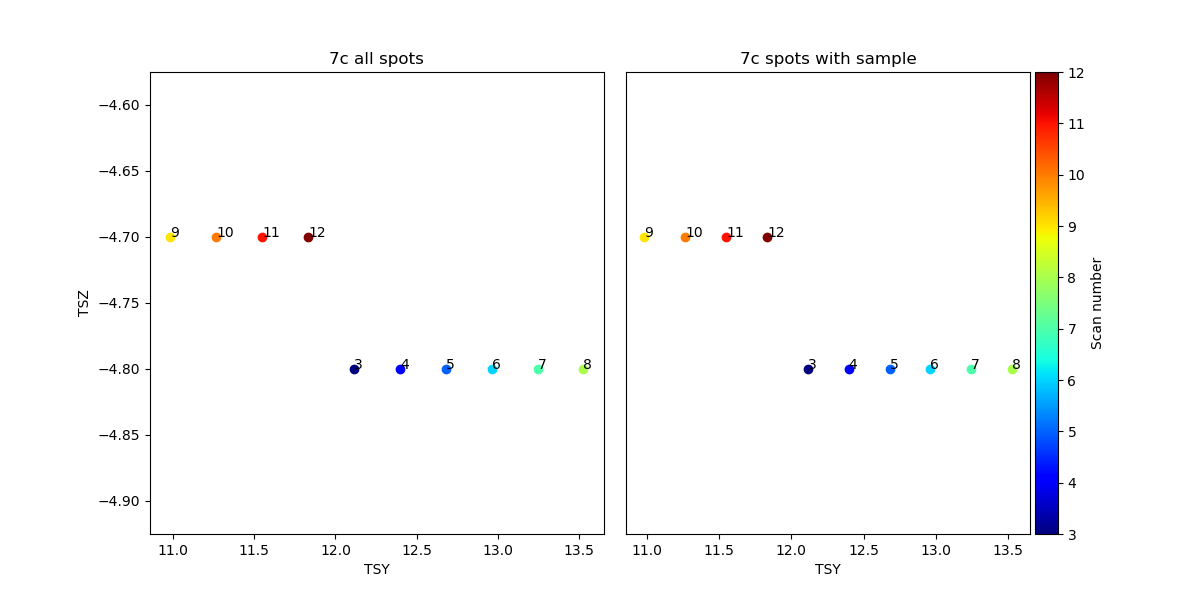

<IPython.core.display.Javascript object>


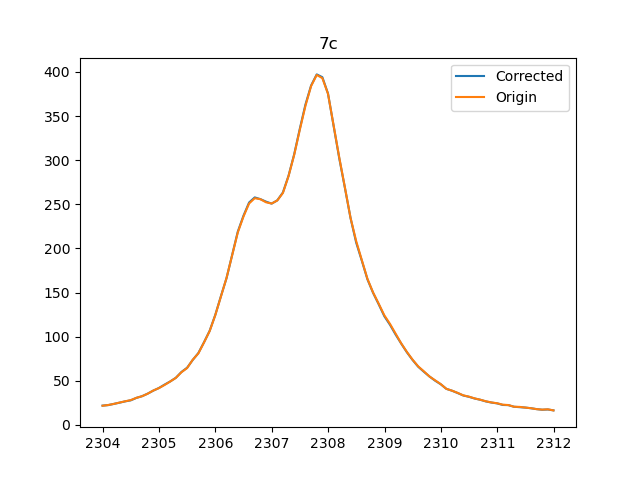

<IPython.core.display.Javascript object>


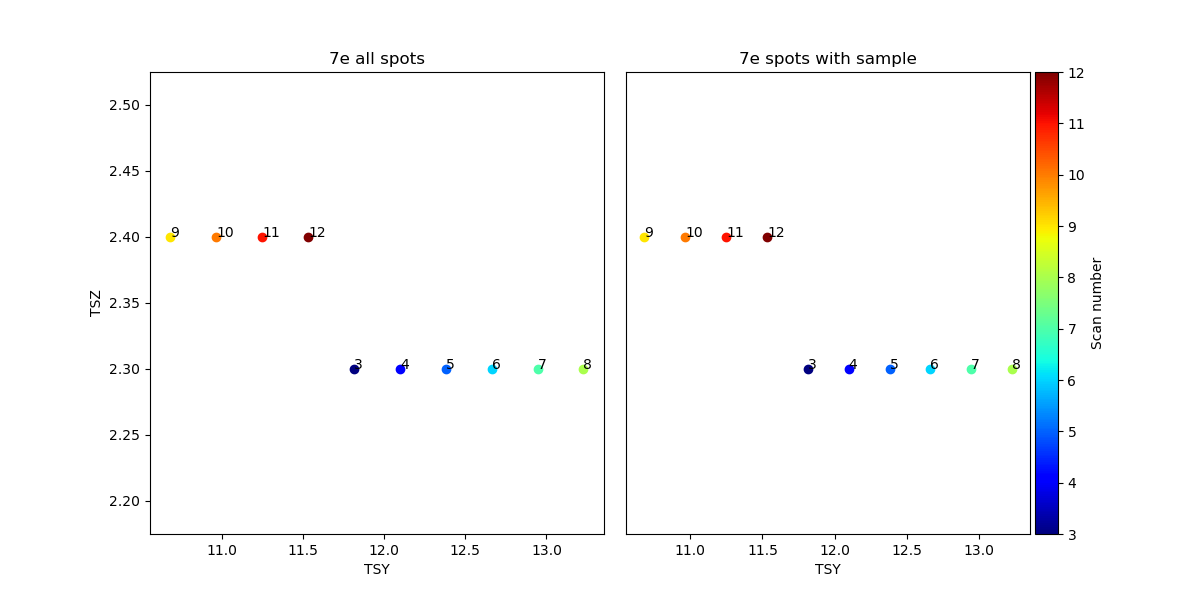

<IPython.core.display.Javascript object>


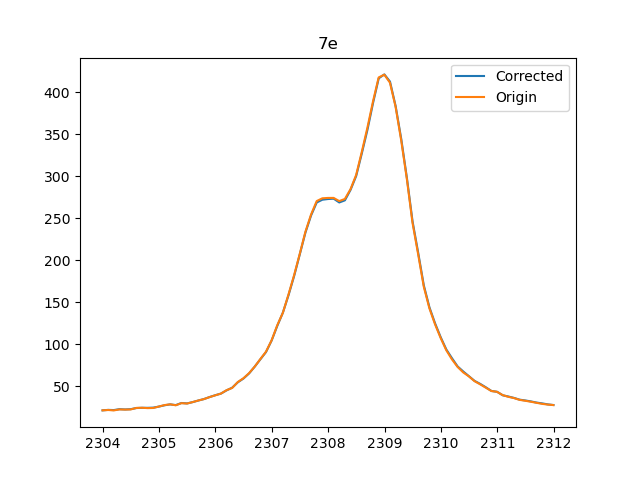

In [97]:
for q in name:
    file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xes\252-' + q + r'_xes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 12.1, 10)

    energy = []
    gdall = []
    I0t = []
    TSY = []
    TSZ = []

    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/xes_en_texs' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))
##########################################################
    ok = []
    ok_3 = []
    for n in range(len(energy)): 
        head =  intensity[n][:10]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-10:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][30:50]
        #middle = middle[abs(stats.zscore(middle))<2]

        if ((middle.mean()>tail.mean()*1.15) and (middle.mean()>head.mean()*1.15)): #####################################
            ok.append(n)
            ok_3.append(n+3)
##########################################################
    fig = plt.figure(figsize=(12, 6), dpi=100)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])

    cmap = plt.cm.get_cmap("jet")
    norm = mpl.colors.Normalize(vmin = 3, vmax = 12)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = plt.cm.jet(np.linspace(0, 1, 10))
    ticks = np.linspace(3, 12, 10)
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

    for i in ok:
        ax2.scatter(TSY[i], TSZ[i] ,color = colors[i])
        ax2.text(TSY[i], TSZ[i], i+3)

    for i in range(len(TSY)):
        ax1.scatter(TSY[i], TSZ[i], color = colors[i])
        ax1.text(TSY[i], TSZ[i], i+3)

    ax1.set_xlabel('TSY')
    ax2.set_xlabel('TSY')
    ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax1.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax2.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax1.set_ylabel('TSZ')
    ax2.set_yticks([])
    ax1.set_title('%s all spots'%q)
    ax2.set_title('%s spots with sample'%q)
    ''' '''
    plt.savefig('%s XES spots.png'%q, bbox_inches='tight')
##########################################################
    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
    measurment_XES = Xes(source,counters=counter_XES)
    measurment_XES.find_outliers()
    measurment_XES.remove_outliers()
    measurment_XES.normalize(mode = 'area')
    pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(q+'_XES_BT2.csv', header=False, index=False)

    source2 = Source(file, list(range(3,12)), None) #3-102 for XAS, #1-12 for XES
    measurment_XES2 = Xas(source2,counters=counter_XES)
    measurment_XES2.find_outliers()
    measurment_XES2.remove_outliers()
    measurment_XES2.normalize(mode = 'area')
    
    fig=plt.figure()

    plt.plot(measurment_XES.x*1000, measurment_XES.signal, label='Corrected')
    plt.plot(measurment_XES2.x*1000, measurment_XES2.signal, label='Origin')
    #plt.text(2304, measurment_XES.signal.max(), ok_3)

    plt.title('%s'%q)
    plt.legend()
    plt.savefig('%s XES correction.png'%q, bbox_inches='tight')

In [84]:
colors.shape

(10, 4)